# DBSCAN

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
df = pd.read_csv("mall_customers.csv")

In [78]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [79]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [80]:
df.shape

(200, 5)

In [81]:
df = df.iloc[:, [3,4]].values

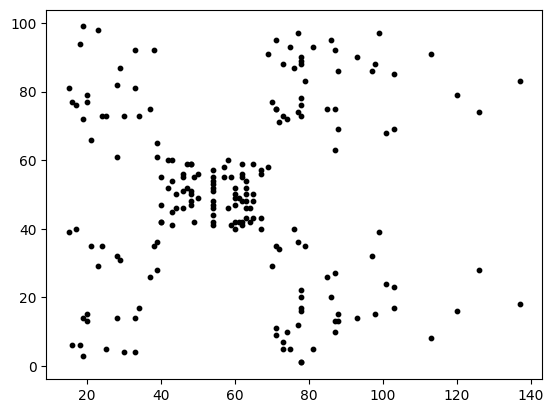

In [91]:
plt.scatter(df[:,0], df[:,1], s=10, c= "black")
plt.show()

In [84]:
from sklearn.cluster import KMeans

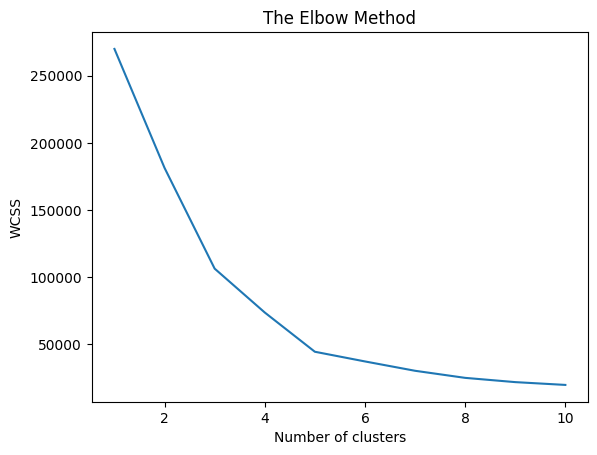

In [85]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters= i,
    init = 'k-means++', max_iter= 300, n_init= 10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title("Método do Cotovelo")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS")
plt.show()

In [86]:
from sklearn.cluster import DBSCAN

In [87]:
dbscan = DBSCAN(eps=5, min_samples=5)

In [88]:
labels = dbscan.fit_predict(df)

In [89]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

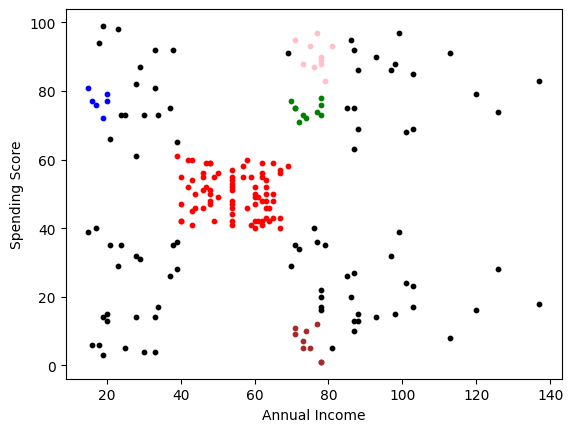

In [90]:
# Visualizando os clusters.
plt.scatter(df[labels == -1, 0], df[labels == -1, 1], s = 10, c = 'black') 

plt.scatter(df[labels == 0, 0], df[labels == 0, 1], s = 10, c = 'blue')
plt.scatter(df[labels == 1, 0], df[labels == 1, 1], s = 10, c = 'red')
plt.scatter(df[labels == 2, 0], df[labels == 2, 1], s = 10, c = 'green')
plt.scatter(df[labels == 3, 0], df[labels == 3, 1], s = 10, c = 'brown')
plt.scatter(df[labels == 4, 0], df[labels == 4, 1], s = 10, c = 'pink')
plt.scatter(df[labels == 5, 0], df[labels == 5, 1], s = 10, c = 'yellow')      
plt.scatter(df[labels == 6, 0], df[labels == 6, 1], s = 10, c = 'silver')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()